In [1]:
#라이브러리 불러오기
import pandas as pd
import numpy as np

## 데이터 불러오기
***

In [ ]:
#엑셀 데이터 열기
play_data=pd.read_excel("game.xlsx", sheet_name='Sheet1')
user_info=pd.read_excel("game.xlsx", sheet_name='Sheet2')

In [ ]:
#데이터 앞 부분 살펴보기
play_data.head()

user_id       date  playtime  playcount  level mainjob  paycount  \
0     1001 2024-01-10        61        1.0     15  dealer         1   
1     1001 2024-01-11        14        1.0     15  dealer         1   
2     1001 2024-01-12        16        1.0     15  tanker         1   
3     1001 2024-01-13      1300        3.0     15  tanker         1   
4     1001 2024-01-14        41        3.0     15  tanker         1   

   payamount  mainjoblevel  
0      60300            60  
1        100            60  
2        151            60  
3       1000            60  
4      16000            60

In [ ]:
user_info.head()

user_id gender  age   joindate  gamecount   city      name
0     1001      f   15 2021-01-01          1  seoul  Harcourt
1     1002      f   46 2023-08-15          3  daegu     Kleon
2     1003      f   13 2023-04-01          1  seoul     Dicky
3     1004      m   45 2022-01-01          2   jeju    Onfroi
4     1005      f   12 2022-05-17          3  daegu    Eirena

## 데이터 확인하기
***

In [ ]:
#데이터 정보 확인하기
play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       2899 non-null   int64         
 1   date          2899 non-null   datetime64[ns]
 2   playtime      2899 non-null   int64         
 3   playcount     2898 non-null   float64       
 4   level         2899 non-null   int64         
 5   mainjob       2899 non-null   object        
 6   paycount      2899 non-null   int64         
 7   payamount     2899 non-null   int64         
 8   mainjoblevel  2899 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 204.0+ KB


In [ ]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    100 non-null    int64         
 1   gender     100 non-null    object        
 2   age        100 non-null    int64         
 3   joindate   100 non-null    datetime64[ns]
 4   gamecount  100 non-null    int64         
 5   city       100 non-null    object        
 6   name       100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB


## 데이터 이상치 확인
***

In [ ]:
# 24시간이 넘는 플레이가 있으면 이상치로 간주
play_data=play_data[play_data["playtime"]<=1440]

In [ ]:
play_data.head(3)

user_id       date  playtime  playcount  level mainjob  paycount  \
0     1001 2024-01-10        61        1.0     15  dealer         1   
1     1001 2024-01-11        14        1.0     15  dealer         1   
2     1001 2024-01-12        16        1.0     15  tanker         1   

   payamount  mainjoblevel  
0      60300            60  
1        100            60  
2        151            60

In [ ]:
play_data.describe()

user_id                           date     playtime    playcount  \
count  2887.000000                           2887  2887.000000  2886.000000   
mean   1034.023207  2024-05-27 06:47:00.644267520   653.889158     6.838877   
min    1001.000000            2024-01-01 00:00:00     1.000000     1.000000   
25%    1010.000000            2024-04-05 00:00:00   121.000000     2.000000   
50%    1020.000000            2024-06-02 00:00:00   586.000000     5.000000   
75%    1062.000000            2024-07-22 00:00:00  1230.500000    11.000000   
max    1099.000000            2024-11-27 00:00:00  1440.000000    78.000000   
std      28.654727                            NaN   545.451144     5.691310   

             level     paycount     payamount  mainjoblevel  
count  2887.000000  2887.000000  2.887000e+03   2887.000000  
mean     38.433668     0.823692  2.504388e+04     42.756841  
min       1.000000     0.000000  0.000000e+00      1.000000  
25%      17.000000     0.000000  0.000000e+00     26.000000  
50%      31.000000     0.000000  0.000000e+00     35.000000  
75%      61.000000     1.000000  5.120000e+03     64.000000  
max      82.000000   150.000000  4.000000e+06     82.000000  
std      25.608364     3.549631  1.317184e+05     23.789176

In [ ]:
user_info.describe()

user_id         age             joindate   gamecount
count   100.000000  100.000000                  100  100.000000
mean   1050.500000   28.980000  2015-01-27 00:57:36    2.610000
min    1001.000000   10.000000  1996-12-14 00:00:00    0.000000
25%    1025.750000   19.750000  2005-11-23 12:00:00    1.000000
50%    1050.500000   25.500000  2020-08-19 12:00:00    2.000000
75%    1075.250000   35.250000  2022-07-04 18:00:00    3.000000
max    1100.000000   66.000000  2024-08-01 00:00:00   12.000000
std      29.011492   13.024437                  NaN    2.557994

In [ ]:
play_data["date"]=pd.to_datetime(play_data["date"])

In [ ]:
#가장 최근 날짜와 오래된 날짜 확인
print(play_data.date.min())
print(play_data.date.max())

2024-01-01 00:00:00
2024-11-27 00:00:00


In [ ]:
play_data.describe(include="object")

mainjob
count     2887
unique       3
top     dealer
freq      1624

In [ ]:
user_info.describe(include="object")

gender   city      name
count     100    100       100
unique      2      9       100
top         f  seoul  Harcourt
freq       53     28         1

# 데이터 분석
***

In [ ]:
#게임 유저의 성별 비율 확인
user_info["gender"].value_counts()

gender
f    53
m    47
Name: count, dtype: int64

In [ ]:
#게임 유저의 도시 확인
user_info["city"].value_counts()

city
seoul       28
busan       16
gyeonggi    16
daegu       11
incheon     10
jeju         9
daejeon      5
ulsan        4
daegu        1
Name: count, dtype: int64

In [ ]:
#게임 유저의 age 데이터 분포 확인
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    else:
        return '50대 이상'

user_info['age_group'] = user_info['age'].apply(age_group)

In [ ]:
user_info["age_group"].value_counts()

age_group
20대       39
10대       25
30대       14
50대 이상    12
40대       10
Name: count, dtype: int64

In [ ]:
#게임 횟수의 분포
user_info["gamecount"].value_counts()

gamecount
1     36
2     16
3     14
0     10
4      8
5      6
9      4
6      2
12     1
10     1
11     1
8      1
Name: count, dtype: int64

In [ ]:
# 가장 오래된 가입일을 가진 유저
user_info[user_info["joindate"]==user_info["joindate"].min()]

user_id gender  age   joindate  gamecount     city   name age_group
97     1098      f   56 1996-12-14          9  incheon  Winny    50대 이상

In [ ]:
# 가장 최근 가입일을 가진 유저
user_info[user_info["joindate"]==user_info["joindate"].max()]

user_id gender  age   joindate  gamecount   city       name age_group
64     1065      f   29 2024-08-01          0  busan  Sylvester       20대

In [ ]:
#유저 별 평균 플레이 타임, 플레이 횟수를 구해주세요
play_data.groupby("user_id")["playtime"].mean().reset_index().mean()

user_id     1045.508197
playtime     401.529510
dtype: float64

In [ ]:
#유저 별 평균 플레이 타임, 플레이 횟수를 구해주세요
play_data.groupby("user_id")["playcount"].mean().reset_index().mean()

user_id      1045.508197
playcount       4.400387
dtype: float64

In [ ]:
# 요일 추출 (0 = 월요일, 6 = 일요일)
play_data['day_of_week'] = play_data['date'].dt.dayofweek
days = ['월', '화', '수', '목', '금', '토', '일']
play_data['day_of_week_kor'] = play_data['day_of_week'].apply(lambda x: days[x])
play_data["day_of_week_kor"].value_counts()

day_of_week_kor
월    426
목    424
토    420
수    415
금    411
화    397
일    394
Name: count, dtype: int64

In [ ]:
# 메인 직업 플레이 수 분포
play_data_job=play_data.groupby(['user_id',"mainjob"])["date"].count().reset_index()
play_data_job.user_id.value_counts().mean()

1.2622950819672132

In [ ]:
# user_id별로 payamount가 1을 초과한 적이 있는지 확인
filtered_users = play_data.groupby('user_id').filter(lambda x: (x['payamount'] <= 1).all())
len(filtered_users.user_id.unique())

20

In [ ]:
# 평균 과금 횟수 과금액을 구해주세요
print(play_data["paycount"].mean())
print(play_data["payamount"].mean())

0.8236924142708694
25043.880845167994


# 유저 데이터 클러스터링
***

In [ ]:
from datetime import date
today_date = pd.Timestamp(date.today())
user_info['days_since_join'] = (today_date - user_info['joindate']).dt.days


user_info['gender'] = user_info['gender'].map({'male': 0, 'female': 1}).fillna(-1)

In [ ]:
aggregated_df = play_data.groupby('user_id').agg({
    'playtime': 'sum',      # playtime 합계
    'playcount': 'sum',     # playcount 합계
    'level': 'mean',        # level 평균
    'paycount': 'sum',      # paycount 합계
    'payamount': 'sum'      # payamount 합계
}).reset_index()

In [ ]:
user_info_filtering=user_info[["user_id","gamecount","days_since_join"]]
user_play_clustering=pd.merge(aggregated_df,user_info_filtering,on=["user_id"])

In [ ]:
user_play_clustering.head(3)

user_id  playtime  playcount      level  paycount  payamount  gamecount  \
0     1001     11604      186.0  25.468750       123     394221          1   
1     1002     59950      485.0  30.000000         0          0          3   
2     1003     31164       38.0  16.863636        74    1211900          1   

   days_since_join  
0             1436  
1              480  
2              616

In [ ]:
X = user_play_clustering.iloc[:,[1,2,3,4,5,6,7]].values

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# wcss 라는 임의의 리스트를 만들었다
wcss = []


for i in range(1,11): # 1,2,3,4,5,6,7,8,9,10
    k_means = KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_) #응집도를 구하는 함수

# 응집도 inertia sse : 클러스터 center point 각 점마다 centerpoint 간의 거리

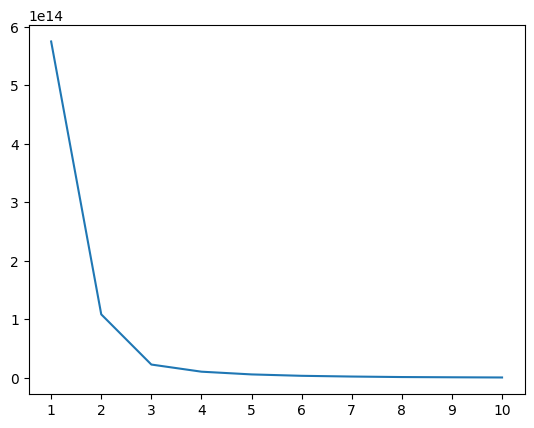

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11));

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=42)
ykmeans = kmeans.fit_predict(X)

In [ ]:
user_play_clustering['ykmeans'] = ykmeans

In [ ]:
user_play_clustering.head()

user_id  playtime  playcount      level  paycount  payamount  gamecount  \
0     1001     11604      186.0  25.468750       123     394221          1   
1     1002     59950      485.0  30.000000         0          0          3   
2     1003     31164       38.0  16.863636        74    1211900          1   
3     1004     21453      115.0  62.000000        32    2248320          2   
4     1005     13135       57.0  10.941176         0          0          3   

   days_since_join  ykmeans  
0             1436        0  
1              480        0  
2              616        0  
3             1071        0  
4              935        0

In [ ]:
user_play_clustering.groupby("ykmeans")[["playtime","playcount","level","paycount","payamount"]].mean()

playtime    playcount      level    paycount     payamount
ykmeans                                                                 
0         14213.509091   166.781818  30.355392   19.836364  3.511879e+05
1        293213.500000  2660.500000  53.134731  366.500000  1.620014e+07
2        129902.000000  1310.750000  52.872918  138.500000  5.146519e+06

In [ ]:
user_play_clustering

user_id  playtime  playcount      level  paycount  payamount  gamecount  \
0      1001     11604      186.0  25.468750       123     394221          1   
1      1002     59950      485.0  30.000000         0          0          3   
2      1003     31164       38.0  16.863636        74    1211900          1   
3      1004     21453      115.0  62.000000        32    2248320          2   
4      1005     13135       57.0  10.941176         0          0          3   
..      ...       ...        ...        ...       ...        ...        ...   
56     1090       100        1.0  40.000000         2       1500          5   
57     1091       150        1.0  45.000000         2       1600          1   
58     1092       830        5.0  62.500000        12     330000          4   
59     1095      3855       50.0  10.875000       120     647000          1   
60     1099       220        7.0  55.000000         2      74000          2   

    days_since_join  ykmeans  
0              1436        0  
1               480        0  
2               616        0  
3              1071        0  
4               935        0  
..              ...      ...  
56             7646        0  
57             6920        0  
58             7853        0  
59             6645        0  
60             7054        0  

[61 rows x 9 columns]

# RFM 기법
***

In [ ]:

user_play_clustering['Recency'] = user_play_clustering['days_since_join']
user_play_clustering['Frequency'] = user_play_clustering['playcount']
user_play_clustering['Monetary'] = user_play_clustering['payamount']

In [ ]:
user_play_clustering['R_Score'] = pd.qcut(user_play_clustering['Recency'], 5, labels=[5, 4, 3, 2, 1], duplicates='drop')

user_play_clustering['F_Score'] = pd.qcut(user_play_clustering['Frequency'], 5, labels=[1, 2, 3, 4,5], duplicates='drop')

In [ ]:
num_bins = len(pd.qcut(user_play_clustering['Monetary'], 5, duplicates='drop').unique()) - 1
labels = list(range(1, num_bins + 1))

# qcut 적용
user_play_clustering['M_Score'] = pd.qcut(
    user_play_clustering['Monetary'],
    q=num_bins,
    labels=labels,
    duplicates='drop'
)

In [ ]:
# RFM 세그먼트 및 점수 생성
user_play_clustering['RFM_Segment'] = (
    user_play_clustering['R_Score'].astype(str) +
    user_play_clustering['F_Score'].astype(str) +
    user_play_clustering['M_Score'].astype(str)
)
user_play_clustering['RFM_Score'] = user_play_clustering[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print(user_play_clustering[['user_id', 'Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score']])

    user_id  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
0      1001     1436      186.0    394221       3       4       2         342   
1      1002      480      485.0         0       5       5       1         551   
2      1003      616       38.0   1211900       4       2       3         423   
3      1004     1071      115.0   2248320       4       4       3         443   
4      1005      935       57.0         0       4       3       1         431   
..      ...      ...        ...       ...     ...     ...     ...         ...   
56     1090     7646        1.0      1500       1       1       2         112   
57     1091     6920        1.0      1600       2       1       2         212   
58     1092     7853        5.0    330000       1       1       2         112   
59     1095     6645       50.0    647000       2       3       3         233   
60     1099     7054        7.0     74000       2       2       2         222   

    RFM_Score  
0          

In [ ]:
user_play_clustering

user_id  playtime  playcount      level  paycount  payamount  gamecount  \
0      1001     11604      186.0  25.468750       123     394221          1   
1      1002     59950      485.0  30.000000         0          0          3   
2      1003     31164       38.0  16.863636        74    1211900          1   
3      1004     21453      115.0  62.000000        32    2248320          2   
4      1005     13135       57.0  10.941176         0          0          3   
..      ...       ...        ...        ...       ...        ...        ...   
56     1090       100        1.0  40.000000         2       1500          5   
57     1091       150        1.0  45.000000         2       1600          1   
58     1092       830        5.0  62.500000        12     330000          4   
59     1095      3855       50.0  10.875000       120     647000          1   
60     1099       220        7.0  55.000000         2      74000          2   

    days_since_join  ykmeans  Recency  Frequency  Monetary R_Score F_Score  \
0              1436        0     1436      186.0    394221       3       4   
1               480        0      480      485.0         0       5       5   
2               616        0      616       38.0   1211900       4       2   
3              1071        0     1071      115.0   2248320       4       4   
4               935        0      935       57.0         0       4       3   
..              ...      ...      ...        ...       ...     ...     ...   
56             7646        0     7646        1.0      1500       1       1   
57             6920        0     6920        1.0      1600       2       1   
58             7853        0     7853        5.0    330000       1       1   
59             6645        0     6645       50.0    647000       2       3   
60             7054        0     7054        7.0     74000       2       2   

   M_Score RFM_Segment  RFM_Score  
0        2         342          9  
1        1         551         11  
2        3         423          9  
3        3         443         11  
4        1         431          8  
..     ...         ...        ...  
56       2         112          4  
57       2         212          5  
58       2         112          4  
59       3         233          8  
60       2         222          6  

[61 rows x 17 columns]

# 데이터 분석 보고서
***

In [ ]:
play_data=pd.read_excel("game.xlsx", sheet_name='Sheet1')
user_info=pd.read_excel("game.xlsx", sheet_name='Sheet2')

- 유저 통계학적 분석
  - 성별, 도시별, 나이별 분포
- 유저 플레이 정보 분석
  - 평균 플레이 타임, 플레이 횟수
  - mau , wau 분석
  - 이탈 분석
- 유저 구매 정보 분석
  - 구매 유저 분석


In [ ]:
import plotly.express as px

In [ ]:
#게임 유저의 age 데이터 분포 확인
def age_group(age):
    if age < 20:
        return '10대'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    else:
        return '50대 이상'

user_info['age_group'] = user_info['age'].apply(age_group)

In [ ]:
# Count age groups
age_group_count = user_info['age_group'].value_counts().reset_index()
age_group_count.columns = ['age_group', 'count']

# Create pie chart with labels inside and blue color scheme
fig = px.pie(age_group_count, values='count', names='age_group',color_discrete_sequence=px.colors.sequential.Blues, hole=0.3)

# Update traces for text inside slices
fig.update_traces(textposition='inside', textinfo='label+percent')

# Show plot
fig.show()

In [ ]:
# Count age groups
city_count = user_info['city'].value_counts().reset_index()
city_count.columns = ['city', 'count']

# Create pie chart with labels inside and blue color scheme
fig = px.pie(city_count, values='count', names='city',color_discrete_sequence=px.colors.sequential.Blues, hole=0.3)

# Update traces for text inside slices
fig.update_traces(textposition='inside', textinfo='label+percent')

# Show plot
fig.show()

In [ ]:
# Count age groups
gender_count = user_info['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']

# Create pie chart with red and blue colors
fig = px.pie(gender_count, values='count', names='gender',
             color_discrete_sequence=['#FF0000', '#0000FF'], hole=0.3)

# Update traces for text inside slices
fig.update_traces(textposition='inside', textinfo='label+percent')

# Show the plot
fig.show()

In [ ]:
# 유저 플레이 분석

In [ ]:

play_data["month_only"] = play_data.date.dt.month
monthly_avg_playtime = play_data.groupby('month_only')['playtime'].mean().reset_index()
monthly_avg_playtime['playtime_rounded'] = monthly_avg_playtime['playtime'].round(1)

# 막대그래프 생성
fig = px.bar(
    monthly_avg_playtime,
    x='month_only',
    y='playtime',
    title='Monthly Average Play Time',
    color_discrete_sequence=px.colors.sequential.Blues,  # 연한 푸른색 계열
    text='playtime_rounded'  # 반올림된 데이터 라벨 추가
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Play Time (minutes)',
    title_x=0.5,  # 제목 가운데 정렬
    width=800  # 가로 길이 조정
)

fig.show()

In [ ]:

play_data["month_only"] = play_data.date.dt.month
monthly_avg_playtime = play_data.groupby('month_only')['playcount'].mean().reset_index()
monthly_avg_playtime['playcount_round'] = monthly_avg_playtime['playcount'].round(1)

# 막대그래프 생성
fig = px.bar(
    monthly_avg_playtime,
    x='month_only',
    y='playcount',
    title='Monthly Average Play Time',
    color_discrete_sequence=px.colors.sequential.Blues,  # 연한 푸른색 계열
    text='playcount_round'  # 반올림된 데이터 라벨 추가
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average Play Count',
    title_x=0.5,  # 제목 가운데 정렬
    width=800  # 가로 길이 조정
)

fig.show()

In [ ]:

play_data["month_only"] = play_data.date.dt.month
monthly_avg_playtime = play_data.groupby('month_only')['paycount'].mean().reset_index()
monthly_avg_playtime['paycount_round'] = monthly_avg_playtime['paycount'].round(1)

# 막대그래프 생성
fig = px.bar(
    monthly_avg_playtime,
    x='month_only',
    y='paycount',
    title='Monthly Average pay count',
    color_discrete_sequence=px.colors.sequential.Blues,  # 연한 푸른색 계열
    text='paycount_round'  # 반올림된 데이터 라벨 추가
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average pay Count',
    title_x=0.5,  # 제목 가운데 정렬
    width=800  # 가로 길이 조정
)

fig.show()

In [ ]:

play_data["month_only"] = play_data.date.dt.month
monthly_avg_playtime = play_data.groupby('month_only')['payamount'].mean().reset_index()
monthly_avg_playtime['payamount_round'] = monthly_avg_playtime['payamount'].round(1)

# 막대그래프 생성
fig = px.bar(
    monthly_avg_playtime,
    x='month_only',
    y='payamount',
    title='Monthly Average pay count',
    color_discrete_sequence=px.colors.sequential.Blues,  # 연한 푸른색 계열
    text='payamount_round'  # 반올림된 데이터 라벨 추가
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Average pay amount',
    title_x=0.5,  # 제목 가운데 정렬
    width=1200  # 가로 길이 조정
)

fig.show()

In [ ]:
play_data_paycount=play_data.groupby("user_id")["paycount"].sum().reset_index()

In [ ]:
play_data_payamount=play_data.groupby("user_id")["payamount"].sum()

In [ ]:
import plotly.graph_objects as go


play_data_paycount
play_data_paycount['user_type'] = play_data_paycount['paycount'].apply(lambda x: '무과금 유저' if x == 0 else '과금 유저')

# 유저 유형별 개수 계산
user_type_count = play_data_paycount['user_type'].value_counts().reset_index()
user_type_count.columns = ['user_type', 'count']

fig = go.Figure(go.Pie(
    labels=user_type_count['user_type'],
    values=user_type_count['count'],
    textinfo='label+percent',  # 라벨과 퍼센트 표시
    marker=dict(colors=px.colors.sequential.Blues[3:])  # 강한 파란색 톤 적용
))

# 그래프 출력
fig.show()

In [ ]:
user_pay=play_data_paycount[["user_id","user_type"]]

In [ ]:
temp=pd.merge(user_pay,play_data,on=["user_id"])

In [ ]:

# 월별, 사용자 유형(user_type)별로 playtime 합계 계산
monthly_playtime = temp.groupby(['month_only', 'user_type'])['playtime'].sum().reset_index()

# 월별, 사용자 유형(user_type)별로 playtime 합계 계산
monthly_playtime = temp.groupby(['month_only', 'user_type'])['playtime'].sum().reset_index()

fig = px.bar(
    monthly_playtime,
    x='month_only',
    y='playtime',
    color='user_type',
    title='Monthly Playtime by User Type',
    labels={'month_only': 'Month', 'playtime': 'Total Playtime (minutes)', 'user_type': 'User Type'},
    text='playtime',
    color_discrete_sequence=px.colors.qualitative.Set1  # 진한 색상 계열
)

# 그래프 출력
fig.show()

In [ ]:
monthly_playtime.groupby("user_type").sum()

month_only  playtime
user_type                      
과금 유저              66   1670529
무과금 유저             45    259395

In [ ]:
paying_users = temp[temp['user_type'] == '과금 유저']
non_paying_users = temp[temp['user_type'] == '무과금 유저']

paying_mainjob_dist = paying_users['mainjob'].value_counts().reset_index()
paying_mainjob_dist.columns = ['mainjob', 'count']

non_paying_mainjob_dist = non_paying_users['mainjob'].value_counts().reset_index()
non_paying_mainjob_dist.columns = ['mainjob', 'count']
fig1 = px.pie(paying_mainjob_dist, names='mainjob', values='count', title='Paying Users Mainjob Distribution')

# 무과금 유저 mainjob 파이그래프 생성
fig2 = px.pie(non_paying_mainjob_dist, names='mainjob', values='count', title='Non-Paying Users Mainjob Distribution')

# 그래프 출력
fig1.show()
fig2.show()